# Linear Regression

* y와 한 개 이상의 독립 변수 (또는 설명 변수) X와의 선형 상관 관계를 모델링하는 회귀분석 기법이다. 한 개의 설명 변수에 기반한 경우에는 단순 선형 회귀, 둘 이상의 설명 변수에 기반한 경우에는 다중 선형 회귀라고 한다. [참고: 위키피디아](https://ko.wikipedia.org/wiki/선형_회귀)

$$y_{\textrm{pred}} = \boldsymbol{W}^{\top}\boldsymbol{x} + b$$

* $\boldsymbol{x} = [x_{1}, x_{2}, \cdots, x_{d}]$
* $\boldsymbol{W} = [w_{1}, w_{2}, \cdots, w_{d}]$
* Loss function: $\mathcal{L} = \sum^{N} (y_{\textrm{pred}} - y)^{2}$

## Training Pseudo Code

```python
for epoch in max_epochs: # 1 epoch: 모든 데이터(N)를 한번 학습 시켰을 때
  for step in num_batches: # num_batches = int(data_size / batch_size)
    1. sampling mini-batches with batch_size
      1-1. data augmentation (필요하면)
    2. calculate loss
    3. calculate the gradient with respect to weights
    4. update weights
```

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf

sess_config = tf.ConfigProto(gpu_options=tf.GPUOptions(allow_growth=True))

tf.set_random_seed(219)
np.random.seed(219)

## Phase 1. Build a model

### Make data

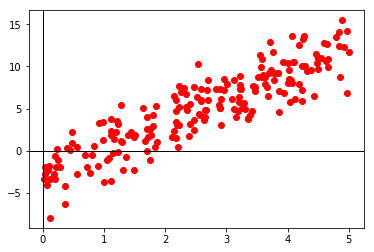

In [40]:
_a = 3
_b = -3
N = 200
data_X = np.random.uniform(low=0, high=5, size=N)
data_y = _a * data_X + _b + np.random.normal(0, 2, N)

plt.plot(data_X, data_y, 'ro')
plt.axhline(0, color='black', lw=1)
plt.axvline(0, color='black', lw=1)
plt.show()

In [19]:
data_X

array([0.54680387, 0.55032031, 1.26302401, 4.32003445, 4.98859849,
       0.70165108, 4.63866948, 3.33945169, 3.80531524, 0.81539984,
       1.45059004, 4.00092623, 4.07980445, 0.26672045, 4.23090273,
       0.15455721, 2.28989591, 4.48497126, 3.37241333, 3.10713258,
       2.43857866, 4.43783919, 1.87033437, 2.88742308, 3.17235282,
       0.77936901, 4.02232299, 4.80863954, 0.97474171, 4.74825353,
       3.50574902, 4.94130435, 1.30303426, 1.10981011, 2.42438653,
       4.06852502, 4.10065378, 0.62757481, 0.13366597, 0.97032254,
       2.10973581, 1.93558649, 0.50131481, 2.50803203, 2.76322   ,
       4.96660063, 0.01976819, 2.44254375, 4.7254961 , 1.35828587,
       2.50646282, 1.0189435 , 0.14801205, 1.47305822, 4.89784207,
       3.1960818 , 1.37896852, 1.41923862, 4.4335499 , 4.3978699 ,
       4.64791441, 3.24140278, 4.88624744, 3.39817919, 4.46523365,
       2.88543044, 2.85187561, 4.21832614, 2.28759182, 0.85486986,
       1.04356891, 3.74672137, 4.37965587, 4.16469378, 0.86415

In [20]:
np.random.shuffle(data_X)

In [24]:
np.random.choice(data_X, len(data_X), replace=False)

array([1.26302401, 2.44254375, 2.76322   , 4.17164384, 0.70748292,
       3.1960818 , 0.88752855, 4.08328598, 0.67162785, 0.62330206,
       2.61302645, 1.04356891, 4.74825353, 4.7254961 , 4.1870604 ,
       2.31804184, 4.46523365, 0.42390672, 4.88048841, 3.4111137 ,
       4.33565877, 0.74064877, 0.54951081, 1.80749714, 0.01559189,
       1.99268574, 4.4335499 , 4.94130435, 1.19018407, 4.96660063,
       2.50646282, 0.55032031, 3.42664695, 3.37241333, 4.23090273,
       0.01976819, 4.43783919, 0.13366597, 1.9950653 , 1.97002929,
       4.80863954, 0.39468499, 2.42438653, 3.04664089, 4.64579217,
       0.85352706, 3.677199  , 2.7236067 , 0.97032254, 3.66004451,
       4.74921045, 3.17235282, 4.16469378, 4.06852502, 1.2222564 ,
       0.80174913, 4.55864842, 0.50131481, 1.22372109, 4.17236383,
       4.63866948, 1.10981011, 4.21324109, 3.39817919, 2.69377666,
       4.3978699 , 4.13651991, 0.57925913, 0.62757481, 3.13990301,
       0.06746702, 4.26253194, 2.54772224, 1.43215857, 2.28989

### Create placeholders for inputs and labels

In [5]:
# 여기를 직접 채워넣으시면 됩니다.
# X: inputs
x = tf.placeholder(tf.float32, name='x')

# y: labels
y = tf.placeholder(tf.float32, name='y')

### Create weight and bias

In [7]:
# 여기를 직접 채워넣으시면 됩니다.
# create Variables
W = tf.get_variable(name='weights', initializer=tf.constant(0.0))
b = tf.get_variable(name='bais', initializer=tf.constant(0.0))

### Build a model: $y = Wx + b$

In [10]:
# 여기를 직접 채워넣으시면 됩니다.
y_pred = W*x +b

### Define loss function

In [11]:
# 여기를 직접 채워넣으시면 됩니다.
loss = tf.square(y - y_pred, name='loss')

### Create a optimizer

In [12]:
# 여기를 직접 채워넣으시면 됩니다.
train_op = tf.train.GradientDescentOptimizer(learning_rate=0.001).minimize(loss)

## Phase 2. Train a model

### Train a model

In [41]:
with tf.Session(config=sess_config) as sess:
  # Initialize all variables
  sess.run(tf.global_variables_initializer())
  
  writer = tf.summary.FileWriter('graphs/01_linear_reg', sess.graph)
  writer.close()
  
  # train the model
  max_epochs = 100
  total_losses = []
  for epoch in range(max_epochs+1):
    total_loss = 0.0

    # 모든 데이터를 random하게 섞는다.
    shuffle_index = np.random.choice(np.arange(200),N)
    for i in shuffle_index:
      x_ = data_X[i]
      y_ = data_y[i]
      # `sess.run` 부분을 직접 채워넣으시면 됩니다.
      _, loss_ = sess.run([train_op, loss], feed_dict={x:x_, y:y_})
      total_loss += loss_
      
    total_loss /= len(data_X)
    total_losses.append(total_loss)
    
    if epoch % 10 == 0:
      print('Epoch %d: total_loss: %f' % (epoch, total_loss))
      
  print('training done!')
      
  W_, b_ = sess.run([W, b])

Epoch 0: total_loss: 12.390123
Epoch 10: total_loss: 6.015025
Epoch 20: total_loss: 4.793853
Epoch 30: total_loss: 4.620926
Epoch 40: total_loss: 4.045620
Epoch 50: total_loss: 5.055851
Epoch 60: total_loss: 4.366363
Epoch 70: total_loss: 4.086910
Epoch 80: total_loss: 4.307153
Epoch 90: total_loss: 4.642418
Epoch 100: total_loss: 4.371126
training done!


### Print the results: W and b

* 정답 W = 3, b = -3

In [42]:
print(W_, b_)

2.9239986 -2.8200607


### Plot the loss funtion

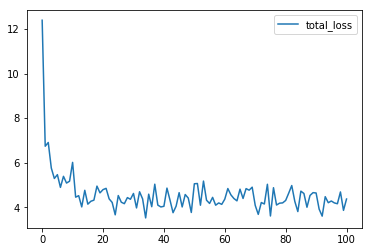

In [43]:
plt.plot(total_losses, label='total_loss')
plt.legend()
plt.show()

### Plot the results

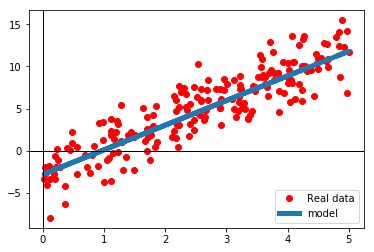

In [44]:
plt.plot(data_X, data_y, 'ro', label='Real data')
plt.plot(data_X, W_ * data_X + b_, lw=5, label='model')
plt.axhline(0, color='black', lw=1)
plt.axvline(0, color='black', lw=1)
plt.legend()
plt.show()